# Exam 2024 -  Data Analysis and Modeling for Earth Sciences

- Time: 10:30am - 12:30pm, Wednesday, April 24, 2024

- Grace Period: 12:30-12:35pm (5 min after deadline)

- Submission link: https://www.dropbox.com/request/AXSbGLCSt8XS4gpTPtIO

### 1. The Fibonacci sequence

In [327]:
# start your code here
import math

# task 1 = 2 
def fibo(n):
    constant = math.sqrt(5)
    element = 1/constant * ((1+constant)/2)**n - 1/constant * ((1-constant)/2)**n
    return element

answer_list = []
sum_answer = 0
for i in range(1,31):
    answer_list.append(round(fibo(i)))
    sum_answer = sum(answer_list)

print("The first 30 elements in Fibonacci sequence are")
print(answer_list,'\n')

print("The sum of the first 30 elements is")
print(sum_answer)
    






The first 30 elements in Fibonacci sequence are
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040] 

The sum of the first 30 elements is
2178308


### 2.  Magnetic field data from Juno MAG (PJ4 to PJ23)

In [328]:
# start your code here
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


magne = pd.read_csv("./time_timedouble_X_Y_Z_Bx_By_Bz_JSSordinate.txt", skiprows=6,\
    sep=' ',dtype=str, encoding="utf-8", usecols=["X_coord","Y_coord","Z_coord","Bx","By","Bz"])


magne["radial distance"] = np.sqrt(magne["X_coord"]**2 + magne["Y_coord"]**2 + magne["Z_coord"]**2)


magne["magnetic"] = np.sqrt(magne["Bx"]**2 + magne["By"]**2 + magne["Bz"]**2)

plt.plot(magne["magnetic"],magne["radial distance"],'b-',label="relationship bewteen intensity and distance")
plt.xlabel("magnetic")
plt.ylabel("radial distance")
plt.legend()
plt.show()

reqs, power = signal.periodogram(magne["magnetic"], fs)
plt.plot(reqs,power)
plt.show()



  Time(string)         Time(double)        X_coord         Y_coord         Z_coord          Bx              By             Bz
0  2017-01-01/00:00:00  1.4832288e+009      -21.7...                                                                         
1  2017-01-01/00:03:00  1.4832290e+009      -21.7...                                                                         
2  2017-01-01/00:06:00  1.4832292e+009      -21.7...                                                                         
3  2017-01-01/00:09:00  1.4832293e+009      -21.7...                                                                         
4  2017-01-01/00:12:00  1.4832295e+009      -21.7...                                                                         


### 3. Monte-Carlo simulations

In [329]:
# start your code here

import numpy as np

def simulation(N):
    x = np.random.uniform(0,1,N)
    y = np.random.uniform(0,1,N)
    r = np.sqrt(x**2+y**2)
    valid_points = r[r<1]
    M = valid_points.size
    ratio = M/N * 4
    return ratio

N = 100
print("MC simulation with N={0}".format(N))
ratio_1 = simulation(N)
print(ratio_1,'\n')

N = 100000
print("MC simulation with N={0}".format(N))
ratio_2 = simulation(N)  
print(ratio_2,'\n')

N = 1000000
print("MC simulation with N={0}".format(N))
ratio_2 = simulation(N)  
print(ratio_2,'\n')


MC simulation with N=100
3.32 

MC simulation with N=100000
3.139 

MC simulation with N=1000000
3.142668 



### 4. Lake Erie seiche

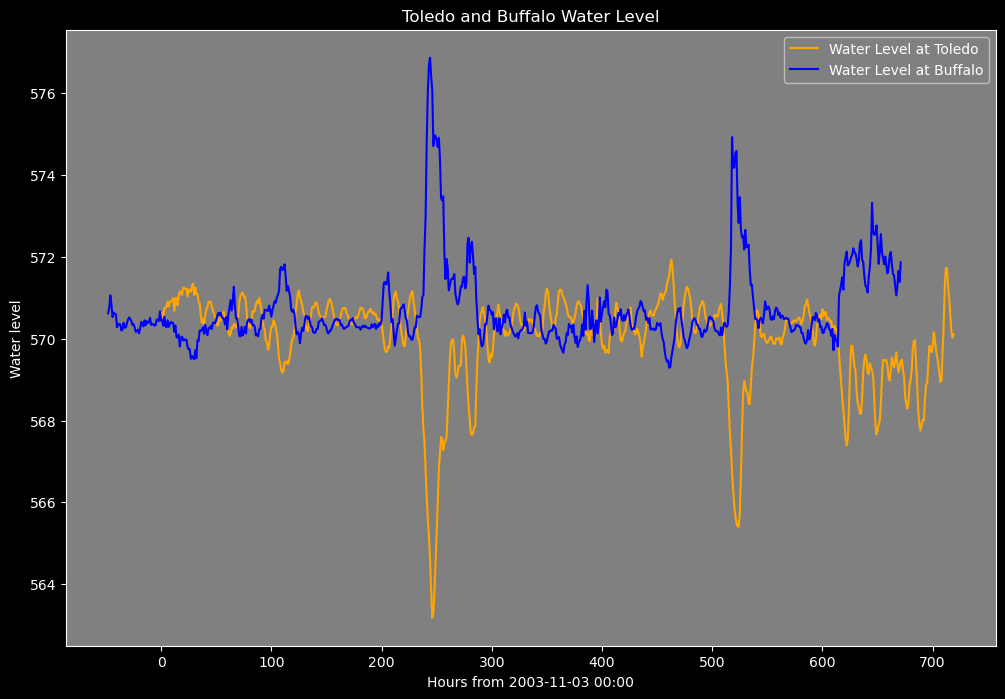

In [330]:
# start your code here

# 85 -- Toledo
# 20 -- Buffalo

import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

Toledo = pd.read_csv("./CO-OPS_9063085_wl.csv")
Buffalo = pd.read_csv("./CO-OPS_9063020_wl.csv")

Toledo["DT"] = pd.to_datetime(Toledo["Date"]+" "+ Toledo["Time (LST/LDT)"])
date_zero_1 = datetime.strptime("2003-11-03 00:00:00","%Y-%m-%d %H:%M:%S")
Toledo["Interval"] = Toledo["DT"].map(lambda x:(x-date_zero_1).days)*24
for index in range(0,len(Toledo)):
    Toledo.at[index,"Interval"] = Toledo.at[index, "Interval"] + index%24


Buffalo["DT"] = pd.to_datetime(Buffalo["Date"]+" "+ Buffalo["Time (LST/LDT)"])
date_zero_2 = datetime.strptime("2003-11-03 00:00:00","%Y-%m-%d %H:%M:%S")
Buffalo["Interval"] = Buffalo["DT"].map(lambda x:(x-date_zero_2).days)*24
for index in range(0,len(Toledo)):
    Buffalo.at[index,"Interval"] = Buffalo.at[index, "Interval"] + index%24


plt.figure(figsize=(12,8))
plt.rcParams['axes.facecolor'] = 'gray'
plt.plot(Toledo["Interval"], Toledo["Verified (ft)"],'orange',label="Water Level at Toledo")
plt.plot(Buffalo["Interval"], Buffalo["Verified (ft)"],'blue',label="Water Level at Buffalo")
plt.xlabel("Hours from 2003-11-03 00:00")
plt.ylabel("Water level")
plt.title("Toledo and Buffalo Water Level")
plt.legend()
plt.show()






### 5. Sea level rise when the ice caps melt

c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\Users\86152\an

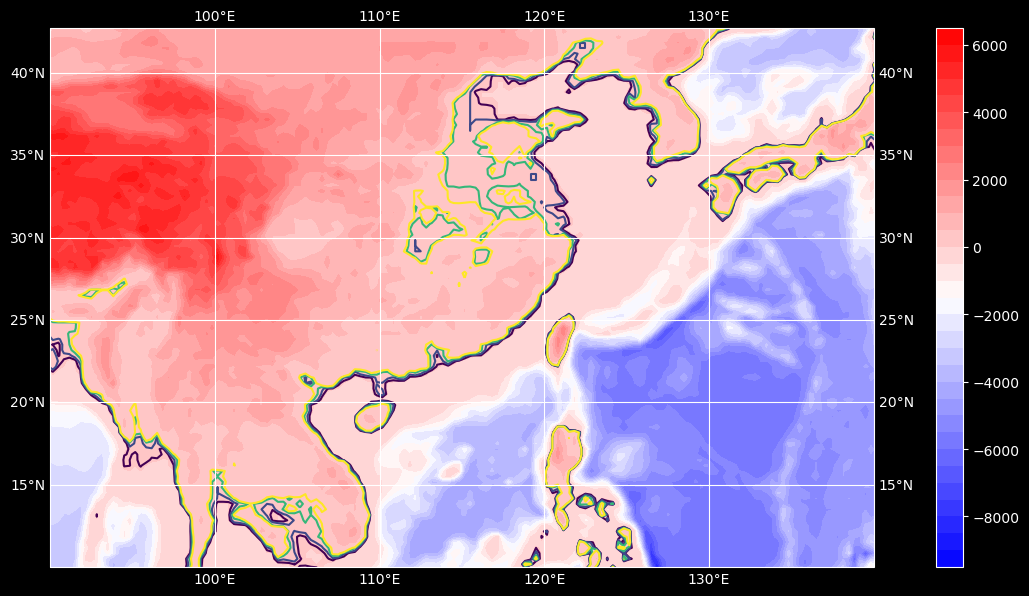

In [332]:
# start your code here
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

lats = np.loadtxt("./etopo20lats.gz") # latitudinal values
lons = np.loadtxt("./etopo20lons.gz") # longitudinal values
data = np.loadtxt("./etopo20data.gz") # elevation data -- plot the coastline

fig = plt.figure(figsize=(16,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
extent = [90,140,10,40]
ax.set_extent(extent)
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.stock_img()

xx,yy = np.meshgrid(lons, lats)
fig = plt.contourf(xx, yy, data, 30, cmap='bwr', transform=ccrs.PlateCarree())
fig1 = ax.contour(xx, yy, data, levels=[10,30,70,100],transform=ccrs.PlateCarree())
plt.colorbar()
plt.show()

